In [51]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,root_mean_squared_error
from sklearn.model_selection import validation_curve
import optuna
from sklearn.metrics import r2_score

In [2]:
data=pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\PROCESSED_DATASET\yield5.csv")

In [52]:
x,y=data.iloc[:,:-1],data.iloc[:,-1:]
y1=np.reshape(y,shape=(-1))


In [53]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y1,train_size=0.8,random_state=32)

In [63]:
params={'learning_rate': 0.07,
 'max_iter': 300,
 'max_depth': 10,
 'min_samples_leaf': 10,
 'l2_regularization':1.2}

In [64]:
model=HistGradientBoostingRegressor(**params)
model.fit(xtrain,ytrain)
model.score(xtrain,ytrain),model.score(xtest,ytest)

(0.9588579647794807, 0.930222145970457)

In [65]:
def objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.2, log=True)
    max_iter = trial.suggest_int("max_iter", 100, 300)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    l2_regularization = trial.suggest_float("l2_regularization", 0.0, 1.0)

    # Create model
    model = HistGradientBoostingRegressor(
        learning_rate=learning_rate,
        max_iter=max_iter,
        max_depth=max_depth,
        min_samples_leaf=min_samples_leaf,
        l2_regularization=l2_regularization,
        random_state=42
    )

    # Train model
    model.fit(xtrain, ytrain)

    # Predictions
    ytest_pred = model.predict(xtest)

    test_r2 = r2_score(ytest, ytest_pred)

    return test_r2  # maximize test R²

In [9]:
study = optuna.create_study(direction="maximize",study_name='histgrad1',storage=r"sqlite:///C:/Users/Avijit/Desktop/AgriAssure/AGRIYIELDPRO/RESULT/HISTGRAD_BOOSTING/histgrad1.db",load_if_exists=True)
study.optimize(objective, n_trials=50)
best_trial = study.best_trial
print(f"Best Test Accuracy: {best_trial.value}")


[I 2025-07-08 22:56:37,120] A new study created in RDB with name: histgrad1
[I 2025-07-08 22:56:37,592] Trial 0 finished with value: 0.9308155954985854 and parameters: {'learning_rate': 0.13248937884812645, 'max_iter': 165, 'max_depth': 7, 'min_samples_leaf': 5, 'l2_regularization': 0.5158571431163227}. Best is trial 0 with value: 0.9308155954985854.
[I 2025-07-08 22:56:38,040] Trial 1 finished with value: 0.7924214354057454 and parameters: {'learning_rate': 0.01565889330921792, 'max_iter': 166, 'max_depth': 7, 'min_samples_leaf': 7, 'l2_regularization': 0.16791001420473017}. Best is trial 0 with value: 0.9308155954985854.
[I 2025-07-08 22:56:38,474] Trial 2 finished with value: 0.9281896072008065 and parameters: {'learning_rate': 0.16950532724202963, 'max_iter': 173, 'max_depth': 19, 'min_samples_leaf': 9, 'l2_regularization': 0.9858702489395955}. Best is trial 0 with value: 0.9308155954985854.
[I 2025-07-08 22:56:38,909] Trial 3 finished with value: 0.9143683809982549 and parameters:

Best Test Accuracy: 0.9320362712320316


In [12]:
params=study.best_params
params

{'learning_rate': 0.1358583146479967,
 'max_iter': 204,
 'max_depth': 13,
 'min_samples_leaf': 6,
 'l2_regularization': 0.16388455411823896}

In [66]:
degrees=np.arange(1,21)
trainscore,valscore=validation_curve(
    estimator=model,X=xtrain,y=ytrain,param_name='max_depth',param_range=degrees,cv=5,scoring='r2'
)
trainmean=trainscore.mean(axis=1)
valmean=valscore.mean(axis=1)

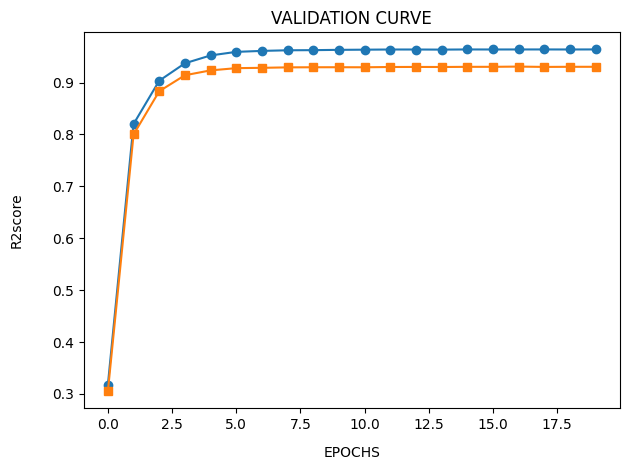

In [67]:
import matplotlib.pyplot as plt
plt.plot(trainmean,label='trainscore',marker='o')
plt.plot(valmean,label='valscore',marker='s')
plt.xlabel("EPOCHS",labelpad=10)
plt.ylabel("R2score",labelpad=20)
plt.title("VALIDATION CURVE")
plt.tight_layout()
plt.show()

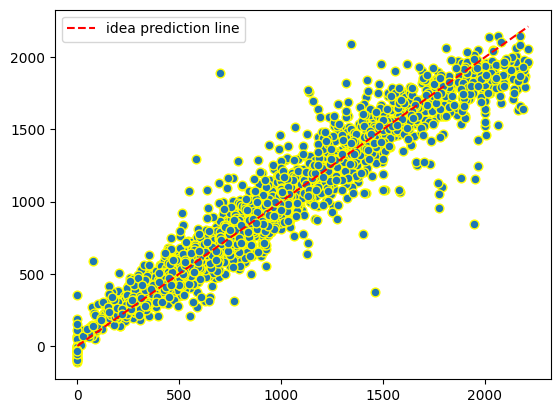

In [68]:
testpred=model.predict(xtest)
plt.scatter(ytest,testpred,s=40,edgecolors='Yellow')
ymin=ytest.min()
ymax=ytest.max()
plt.plot([ymin,ymax],[ymin,ymax],'r--',label='idea prediction line')
plt.legend()
plt.show()

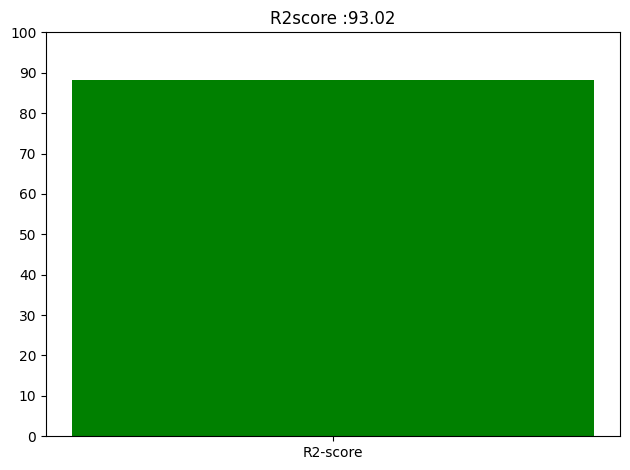

In [69]:
r2=r2_score(ytest,testpred)
mae=mean_absolute_error(ytest,testpred)
score=[mae,r2]
metrics=["R2-score"]
plt.bar(metrics,score,color='green')
plt.yticks(range(0,101,10))
plt.title(f"R2score :{r2*100:.2f}")
plt.tight_layout()
plt.show()


In [71]:
import joblib 
joblib.dump(model,r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\MODEL\histgradboosting.pkl")

['C:\\Users\\Avijit\\Desktop\\AgriAssure\\AGRIYIELDPRO\\MODEL\\histgradboosting.pkl']

In [72]:
print(f"train r2score = {r2_score(ytrain,model.predict(xtrain))*100}")
print(f"test r2score = {r2_score(ytest,testpred)*100}")

train r2score = 95.88579647794808
test r2score = 93.0222145970457


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import joblib

# --- Dummy Data Creation (for a runnable example) ---
# In a real scenario, you would load your data here.
# Assuming your data is in a DataFrame named 'data'.
np.random.seed(42)
num_samples = 1000
num_features = 5
data = pd.DataFrame(np.random.rand(num_samples, num_features + 1),
                    columns=[f'feature_{i}' for i in range(num_features)] + ['target'])

# --- Data Preparation (same as your original code) ---
# Separate features (x) and target (y)
x = data.iloc[:, :-1]
y = data.iloc[:, -1:]
y1 = np.reshape(y, newshape=(-1))

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y1, train_size=0.8, random_state=32)

# --- Define the Model Parameters ---
# These are the same parameters you provided.
params = {
    'learning_rate': 0.07,
    'max_iter': 300,
    'max_depth': 10,
    'min_samples_leaf': 10,
    'l2_regularization': 1.2
}

# --- Create the Pipeline ---
# A pipeline allows you to chain multiple steps. Here, we just have one step:
# the HistGradientBoostingRegressor model itself.
# This makes the entire process a single, callable object.
pipeline = Pipeline(steps=[
    ('regressor', HistGradientBoostingRegressor(**params))
])

# --- Train the Pipeline ---
# You can now call .fit() and .score() directly on the pipeline object.
# It handles passing the data to the correct step (the regressor).
print("Training the model via the pipeline...")
pipeline.fit(xtrain, ytrain)
print("Training complete.")

# --- Evaluate the Model ---
# The pipeline's .score() method will automatically call the regressor's score method.
train_score = pipeline.score(xtrain, ytrain)
test_score = pipeline.score(xtest, ytest)
print(f"R-squared on training data: {train_score:.4f}")
print(f"R-squared on testing data: {test_score:.4f}")

# --- Save the Entire Pipeline ---
# It's best practice to save the entire pipeline object, not just the model.
# This ensures that any preprocessing steps you add later are also saved
# and applied correctly when you load the model for future predictions.
joblib.dump(pipeline, "histgradboosting_pipeline.pkl")
print("Pipeline saved to histgradboosting_pipeline.pkl")

# To load and use the pipeline later:
# loaded_pipeline = joblib.load("histgradboosting_pipeline.pkl")
# loaded_pipeline.predict(new_data)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline
import joblib

# Load the data from your specified file path
data = pd.read_csv(r"C:\Users\Avijit\Desktop\AgriAssure\AGRIYIELDPRO\PROCESSED_DATASET\yield5.csv")

# --- Data Preparation (same as your original code) ---
# Separate features (x) and target (y)
x = data.iloc[:, :-1]
y = data.iloc[:, -1:]
y1 = np.reshape(y, newshape=(-1))

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y1, train_size=0.8, random_state=32)

# --- Define the Model Parameters ---
# These are the same parameters you provided.
params = {
    'learning_rate': 0.07,
    'max_iter': 300,
    'max_depth': 10,
    'min_samples_leaf': 10,
    'l2_regularization': 1.2
}

# --- Create the Pipeline ---
# A pipeline allows you to chain multiple steps. Here, we just have one step:
# the HistGradientBoostingRegressor model itself.
# This makes the entire process a single, callable object.
pipeline = Pipeline(steps=[
    ('regressor', HistGradientBoostingRegressor(**params))
])

# --- Train the Pipeline ---
# You can now call .fit() and .score() directly on the pipeline object.
# It handles passing the data to the correct step (the regressor).
print("Training the model via the pipeline...")
pipeline.fit(xtrain, ytrain)
print("Training complete.")

# --- Evaluate the Model ---
# The pipeline's .score() method will automatically call the regressor's score method.
train_score = pipeline.score(xtrain, ytrain)
test_score = pipeline.score(xtest, ytest)
print(f"R-squared on training data: {train_score:.4f}")
print(f"R-squared on testing data: {test_score:.4f}")

# --- Save the Entire Pipeline ---
# It's best practice to save the entire pipeline object, not just the model.
# This ensures that any preprocessing steps you add later are also saved
# and applied correctly when you load the model for future predictions.
joblib.dump(pipeline, "histgradboosting_pipeline.pkl")
print("Pipeline saved to histgradboosting_pipeline.pkl")

# To load and use the pipeline later:
# loaded_pipeline = joblib.load("histgradboosting_pipeline.pkl")
# loaded_pipeline.predict(new_data)
